<a href="https://colab.research.google.com/github/mekapothulaashokreddy/TWSIP/blob/main/fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [34]:
fake = pd.read_csv("/content/Fake.csv")
true = pd.read_csv("/content/True.csv")

In [35]:
fake.shape

(23481, 4)

In [36]:
true.shape

(21417, 4)

In [37]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [38]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [39]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [40]:
# Check the data
data.head()

,title,text,subject,date,target
0,EPIC! HERE’S THE BRUTAL TRUTH On Crime In The ...,Wow! This is so epic and truthful! Bravo Bill ...,politics,"Jul 9, 2016",fake
1,Kremlin 'deeply concerned' by rising tension o...,MOSCOW (Reuters) - Moscow is deeply concerned ...,politicsNews,"September 22, 2017",true
2,"MAID SCREAMS, BEGS FOR HELP As She Holds On To...","While immature, snowflake college students fre...",left-news,"Apr 5, 2017",fake
3,U.S. states gird for fight as Trump targets co...,WASHINGTON (Reuters) - Pennsylvania’s Attorney...,politicsNews,"December 1, 2017",true
4,"Saudi airplane arrives in Baghdad, first time ...",BAGHDAD (Reuters) - A Saudi Arabian commercial...,worldnews,"October 18, 2017",true


In [41]:
# Removing the date (we won't use it for the analysis)
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,EPIC! HERE’S THE BRUTAL TRUTH On Crime In The ...,Wow! This is so epic and truthful! Bravo Bill ...,politics,fake
1,Kremlin 'deeply concerned' by rising tension o...,MOSCOW (Reuters) - Moscow is deeply concerned ...,politicsNews,true
2,"MAID SCREAMS, BEGS FOR HELP As She Holds On To...","While immature, snowflake college students fre...",left-news,fake
3,U.S. states gird for fight as Trump targets co...,WASHINGTON (Reuters) - Pennsylvania’s Attorney...,politicsNews,true
4,"Saudi airplane arrives in Baghdad, first time ...",BAGHDAD (Reuters) - A Saudi Arabian commercial...,worldnews,true


In [42]:
# Removing the title (we will only use the text)
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,Wow! This is so epic and truthful! Bravo Bill ...,politics,fake
1,MOSCOW (Reuters) - Moscow is deeply concerned ...,politicsNews,true
2,"While immature, snowflake college students fre...",left-news,fake
3,WASHINGTON (Reuters) - Pennsylvania’s Attorney...,politicsNews,true
4,BAGHDAD (Reuters) - A Saudi Arabian commercial...,worldnews,true


In [43]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,wow! this is so epic and truthful! bravo bill ...,politics,fake
1,moscow (reuters) - moscow is deeply concerned ...,politicsNews,true
2,"while immature, snowflake college students fre...",left-news,fake
3,washington (reuters) - pennsylvania’s attorney...,politicsNews,true
4,baghdad (reuters) - a saudi arabian commercial...,worldnews,true


In [44]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [45]:
# Check
data.head()

,text,subject,target
0,wow this is so epic and truthful bravo bill o ...,politics,fake
1,moscow reuters moscow is deeply concerned by ...,politicsNews,true
2,while immature snowflake college students frea...,left-news,fake
3,washington reuters pennsylvania’s attorney ge...,politicsNews,true
4,baghdad reuters a saudi arabian commercial ai...,worldnews,true


In [46]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
data.head()

,text,subject,target
0,wow epic truthful bravo bill reilly,politics,fake
1,moscow reuters moscow deeply concerned escalat...,politicsNews,true
2,immature snowflake college students freak pron...,left-news,fake
3,washington reuters pennsylvania’s attorney gen...,politicsNews,true
4,baghdad reuters saudi arabian commercial airpl...,worldnews,true


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


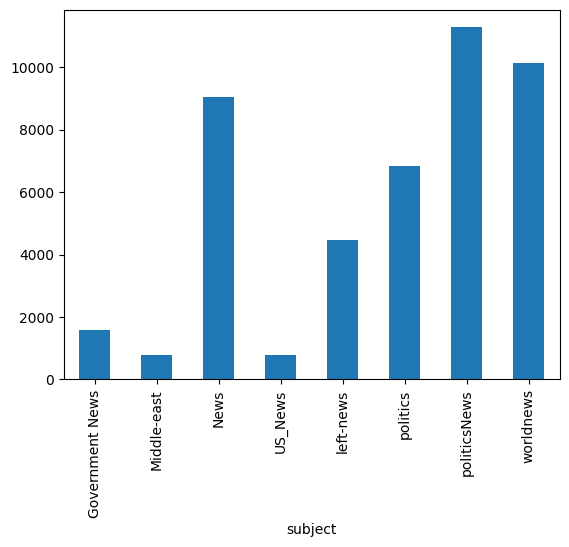

In [48]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


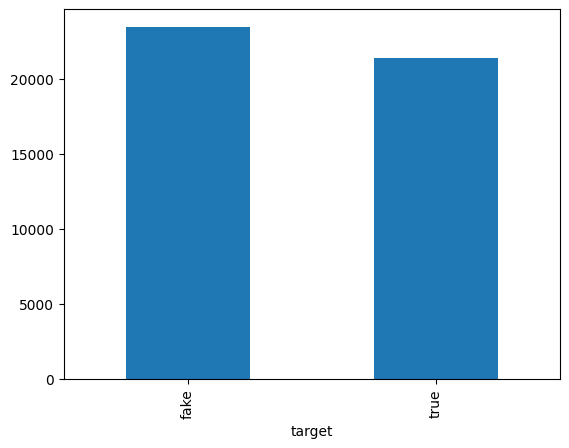

In [49]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

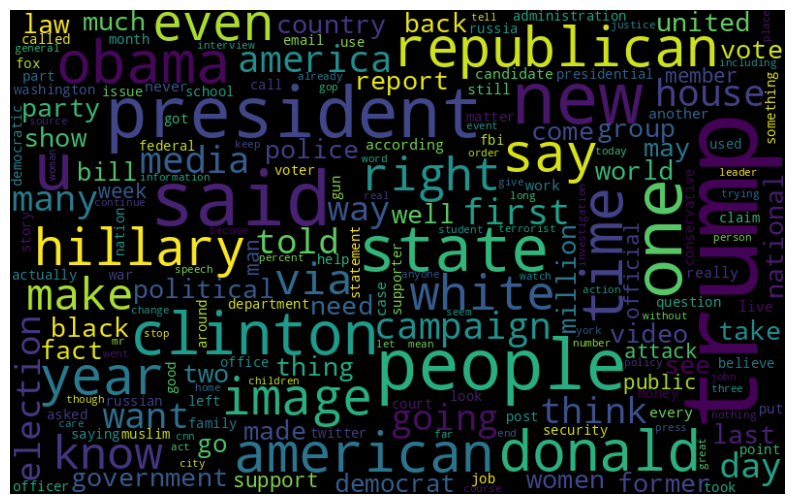

In [50]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

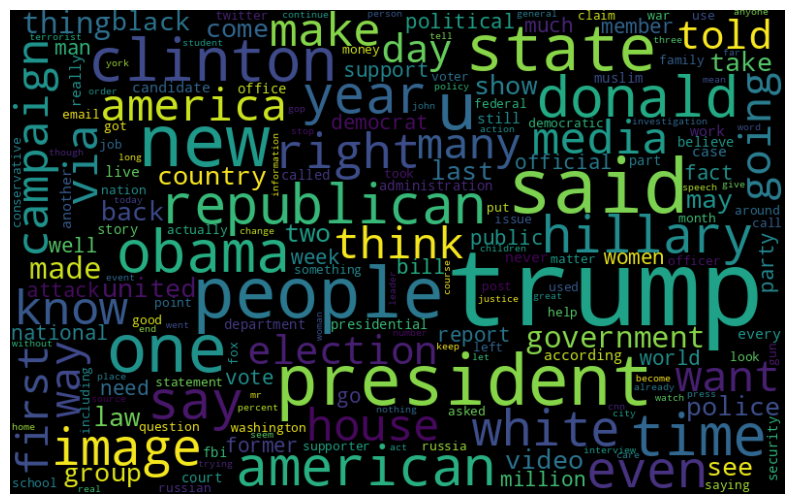

In [51]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [52]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

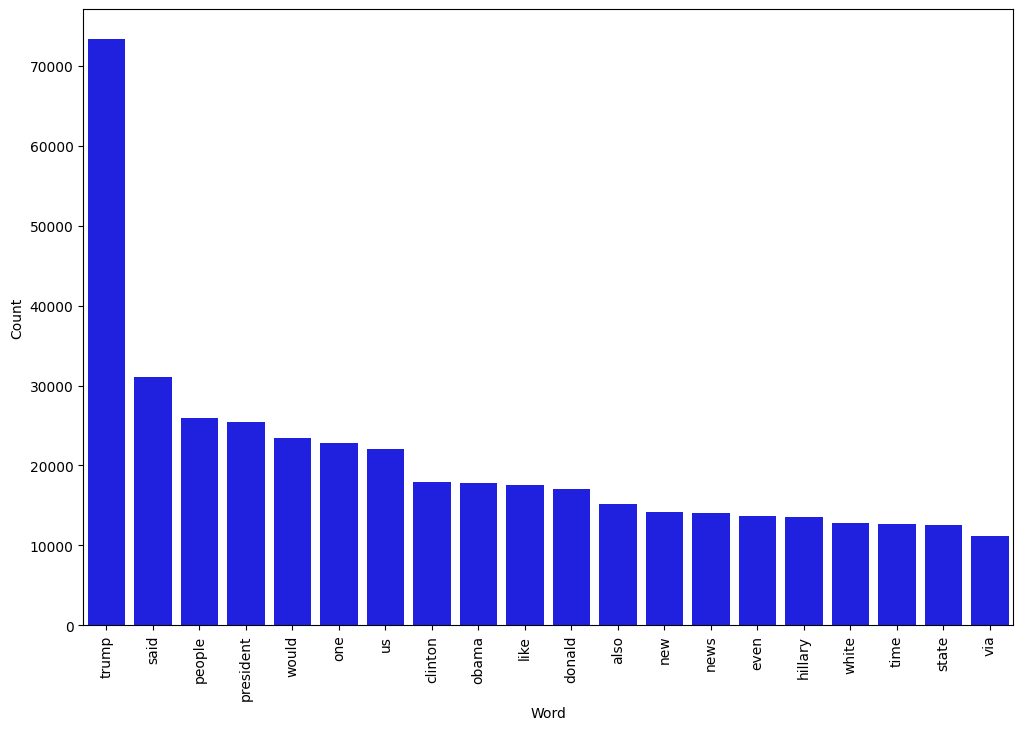

In [53]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

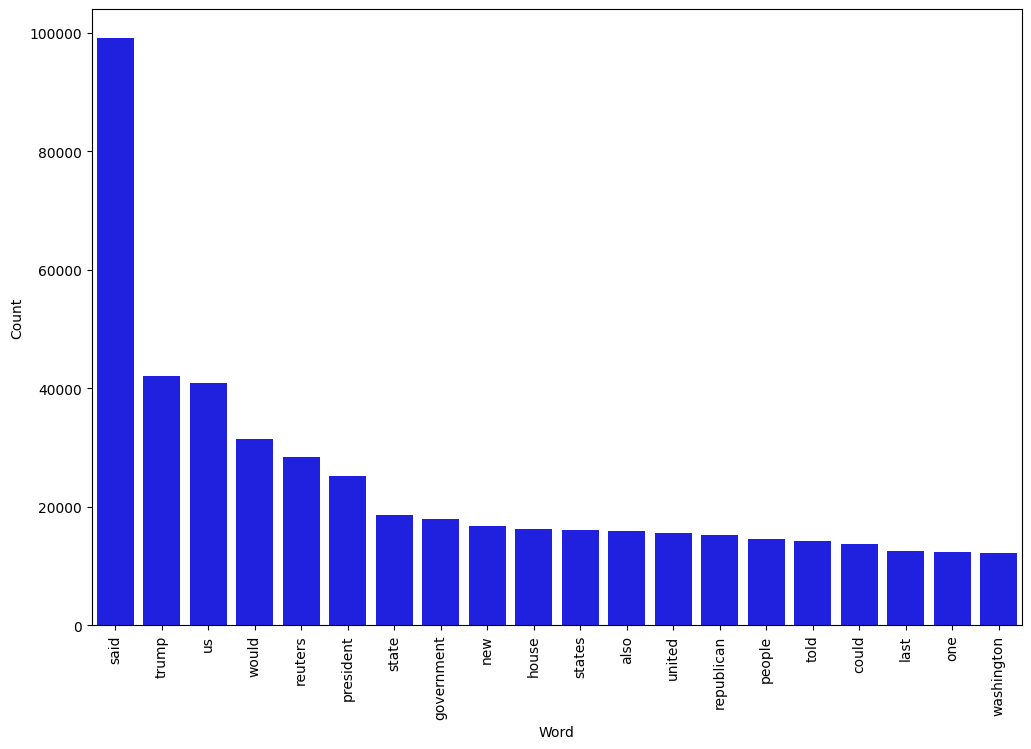

In [54]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

In [55]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [56]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [57]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.82%


Confusion matrix, without normalization


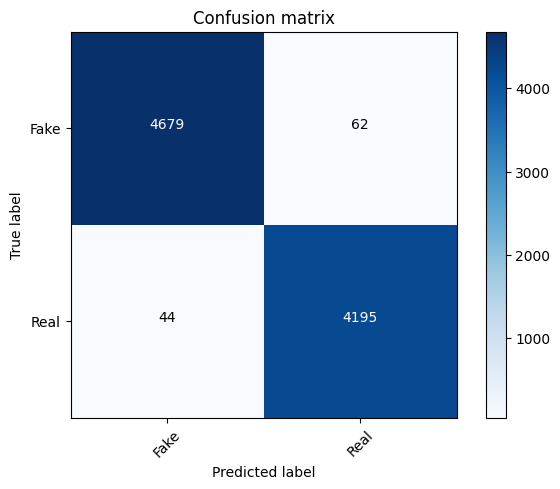

In [58]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [59]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20,
                                           splitter='best',
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.64%


Confusion matrix, without normalization


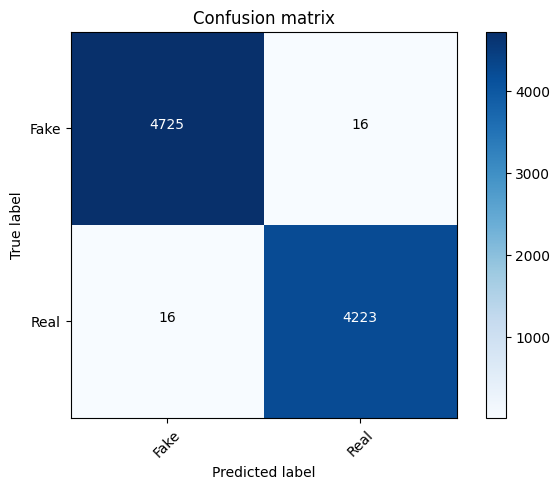

In [60]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [61]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.99%


Confusion matrix, without normalization


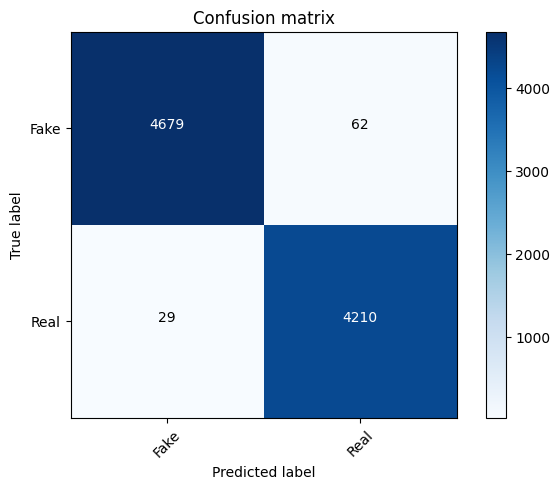

In [62]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])